<a href="https://colab.research.google.com/github/akram01Br/PixelHawk-OD/blob/main/K_meansFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# votre réponse
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
from sklearn import datasets
iris_dataset = datasets.load_iris()
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/Mall_Customers.csv')
dataset.describe()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
{#m = iris_dataset['data']
w = pd.DataFrame(iris_dataset.data)
#X = dataset.iloc[:, [3,4]].values
X = w.iloc[:, [0,3]].values
X.shape


(150, 2)

In [ ]:
m=X.shape[0] #number of training examples
n=X.shape[1] #number of features. Here n=2
n_iter=100
n

2

In [ ]:
K=5 # number of clusters


In [ ]:
#Initialize the centroids randomly from the data points
Centroids=np.array([]).reshape(n,0)


In [ ]:
for i in range(K):
  rand=np.random.randint(0,m-1)
  Centroids=np.c_[Centroids,X[rand]]

In [ ]:
Output={}

In [ ]:
EuclidianDistance=np.array([]).reshape(m,0)

In [ ]:
for k in range(K):
  tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
  EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1

In [ ]:
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]

for k in range(K):
    Y[k+1]=Y[k+1].T

for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)

In [ ]:
for i in range(n_iter):
     #step 2.a
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
     #step 2.b
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]

      for k in range(K):
          Y[k+1]=Y[k+1].T

      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y

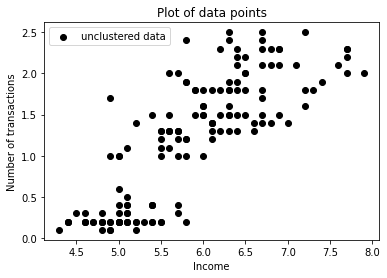

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.title('Plot of data points')
plt.show()

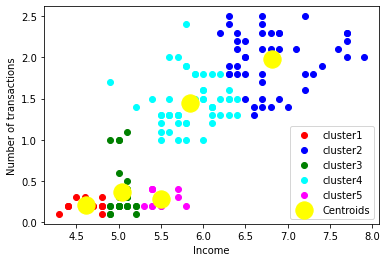

In [ ]:
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.show()